# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**


In [92]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [94]:
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [96]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount',
       'PreviousTransactionDate', 'TransactionType', 'Location', 'DeviceID',
       'IP Address', 'MerchantID', 'Channel', 'CustomerAge',
       'CustomerOccupation', 'TransactionDuration', 'LoginAttempts',
       'AccountBalance', 'TransactionDate'],
      dtype='object')

In [97]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [98]:
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [99]:
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [100]:
for col in df.select_dtypes(include='object').columns:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-100-1389660252.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [101]:
for col in df.select_dtypes(include='float64').columns:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-101-2993345612.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [102]:
df.dropna(subset=['PreviousTransactionDate', 'TransactionDate'], inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2485 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2485 non-null   object        
 1   AccountID                2485 non-null   object        
 2   TransactionAmount        2485 non-null   float64       
 3   PreviousTransactionDate  2485 non-null   datetime64[ns]
 4   TransactionType          2485 non-null   object        
 5   Location                 2485 non-null   object        
 6   DeviceID                 2485 non-null   object        
 7   IP Address               2485 non-null   object        
 8   MerchantID               2485 non-null   object        
 9   Channel                  2485 non-null   object        
 10  CustomerAge              2485 non-null   float64       
 11  CustomerOccupation       2485 non-null   object        
 12  TransactionDuration      2485 non-null 

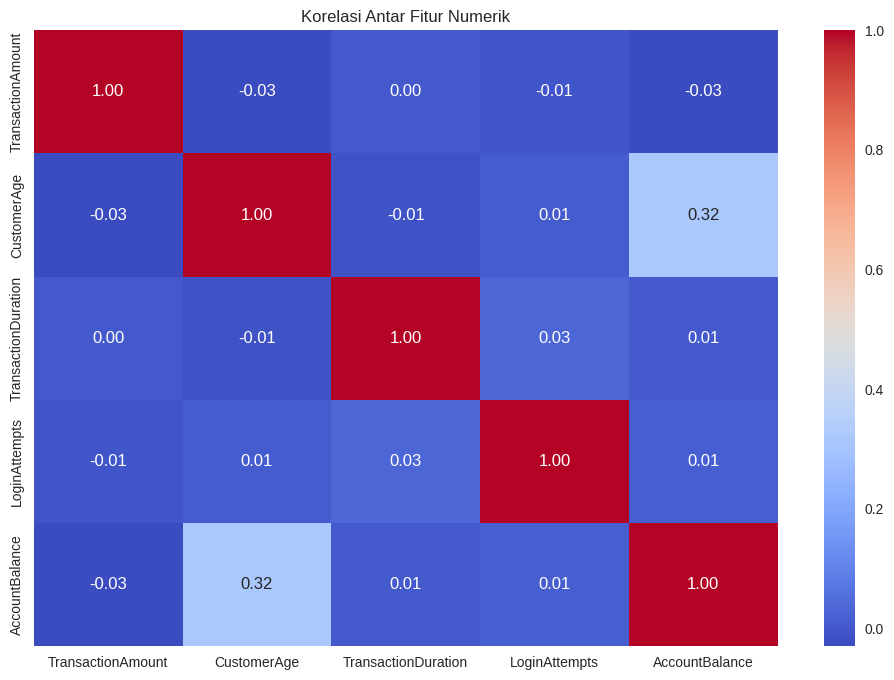

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

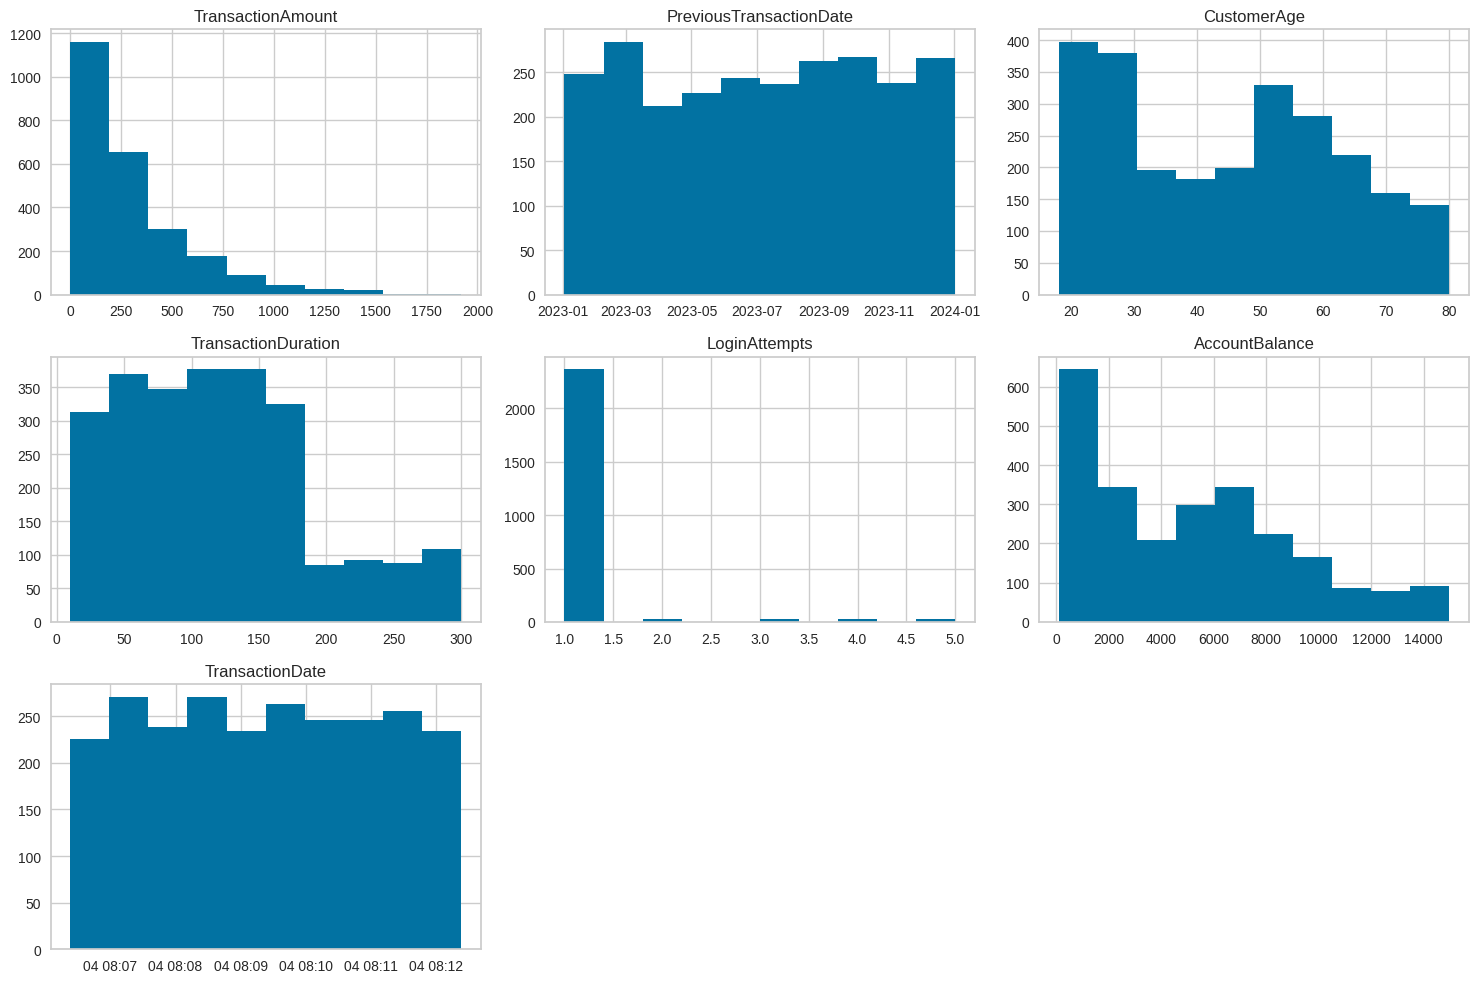

In [105]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

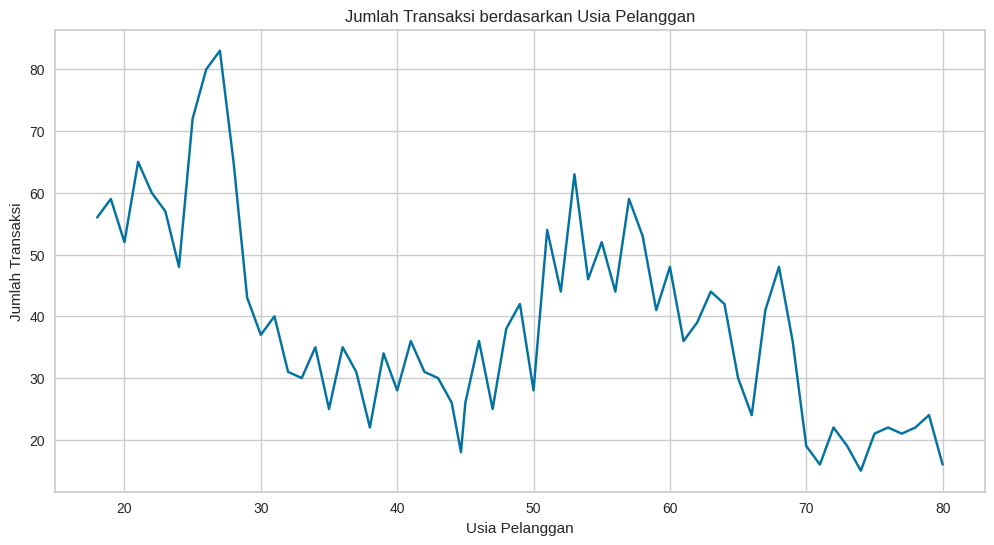

In [106]:
# prompt: Apakah umur atau pekerjaan berpengaruh terhadap jumlah transaksi?

transactions_by_age = df.groupby('CustomerAge').size().reset_index(name='TransactionCount')

plt.figure(figsize=(12, 6))
sns.lineplot(data=transactions_by_age, x='CustomerAge', y='TransactionCount')
plt.title('Jumlah Transaksi berdasarkan Usia Pelanggan')
plt.xlabel('Usia Pelanggan')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)
plt.show()

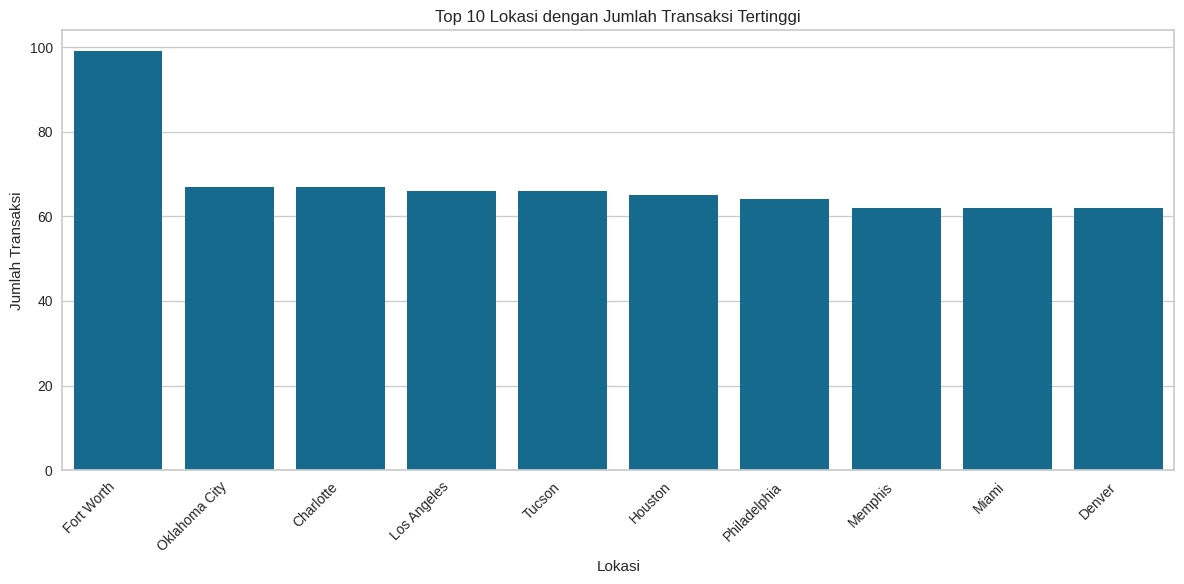

In [107]:
avg_transactions_by_location = df.groupby('Location').size().reset_index(name='AverageTransactionCount')
avg_transactions_by_location = avg_transactions_by_location.sort_values(by='AverageTransactionCount', ascending=False).head(10)
avg_transactions_by_location.rename(columns={'AverageTransactionCount': 'Jumlah Transaksi'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Jumlah Transaksi', data=avg_transactions_by_location)
plt.title('Top 10 Lokasi dengan Jumlah Transaksi Tertinggi')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

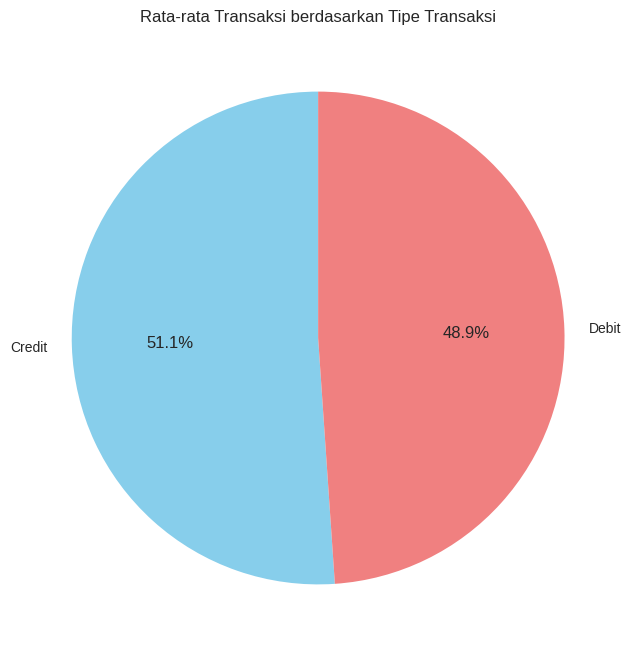

In [108]:
average_transaction_by_type = df.groupby('TransactionType')['TransactionAmount'].mean()

plt.figure(figsize=(8, 8))
plt.pie(average_transaction_by_type, labels=average_transaction_by_type.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Rata-rata Transaksi berdasarkan Tipe Transaksi')
plt.show()

In [109]:
# prompt: yg di proses data train aja

import numpy as np
# (Opsional) Preprocessing Data Training [Skilled]
#
# **Biarkan kosong jika tidak menerapkan kriteria skilled**

# Fitur rekayasa (Feature Engineering): Menambahkan fitur baru dari data yang sudah ada
df['TransactionFrequency'] = df.groupby('AccountID')['TransactionID'].transform('count')

# Mengganti nilai kategorikal dengan nilai numerik
df['TransactionType_Encoded'] = df['TransactionType'].apply(lambda x: 1 if x == 'Credit' else 0)

# Membuat fitur selisih waktu transaksi sebelumnya
df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds().fillna(0)

# Transformasi logaritmik pada fitur miring (jika ada) untuk menormalkan distribusi
for col in ['TransactionAmount', 'AccountBalance', 'LoginAttempts']:
    if df[col].skew() > 1: # Cek kemiringan (skewness)
        df[col] = np.log1p(df[col])

# Menampilkan beberapa baris pertama dari dataframe yang telah diproses
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionFrequency,TransactionType_Encoded,TimeSinceLastTransaction
0,TX000001,AC00128,2.714032,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.000000,Doctor,81.0,0.693147,5112.21,2024-11-04 08:08:08,7,0,49477134.0
1,TX000002,AC00455,5.932882,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.000000,Doctor,141.0,0.693147,13758.91,2024-11-04 08:09:35,7,0,42823516.0
2,TX000003,AC00019,4.846468,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.000000,Student,56.0,0.693147,1122.35,2024-11-04 08:07:04,5,0,41694656.0
3,TX000004,AC00070,5.223055,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.000000,Student,25.0,0.693147,8569.06,2024-11-04 08:09:06,8,0,47403415.0
4,TX000005,AC00411,2.670694,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,44.678444,Student,198.0,0.693147,7429.40,2024-11-04 08:06:39,4,1,33228915.0


# **3. Pembersihan dan Pra Pemrosesan Data**


In [110]:
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
PreviousTransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [111]:
df.duplicated().sum()

np.int64(21)

In [112]:
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'])
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionFrequency,TransactionType_Encoded,TimeSinceLastTransaction
0,2.714032,2023-04-11 16:29:14,Debit,San Diego,ATM,70.000000,Doctor,81.0,0.693147,5112.21,2024-11-04 08:08:08,7,0,49477134.0
1,5.932882,2023-06-27 16:44:19,Debit,Houston,ATM,68.000000,Doctor,141.0,0.693147,13758.91,2024-11-04 08:09:35,7,0,42823516.0
2,4.846468,2023-07-10 18:16:08,Debit,Mesa,Online,19.000000,Student,56.0,0.693147,1122.35,2024-11-04 08:07:04,5,0,41694656.0
3,5.223055,2023-05-05 16:32:11,Debit,Raleigh,Online,26.000000,Student,25.0,0.693147,8569.06,2024-11-04 08:09:06,8,0,47403415.0
4,2.670694,2023-10-16 17:51:24,Credit,Atlanta,Online,44.678444,Student,198.0,0.693147,7429.40,2024-11-04 08:06:39,4,1,33228915.0


In [113]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = df.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionFrequency,TransactionType_Encoded,TimeSinceLastTransaction
0,0.338779,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08,0.193548,0.0,0.728036
1,0.777971,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35,0.193548,0.0,0.516531
2,0.629737,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04,0.129032,0.0,0.480647
3,0.681120,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06,0.225806,0.0,0.662117
4,0.332866,2023-10-16 17:51:24,Credit,Atlanta,Online,0.430297,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39,0.096774,1.0,0.211537


In [114]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns
label_encoder = LabelEncoder()

for col in categorical_cols:
  df[col] = label_encoder.fit_transform(df[col])

df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionFrequency,TransactionType_Encoded,TimeSinceLastTransaction
0,0.338779,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,0.193548,0.0,0.728036
1,0.777971,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,0.193548,0.0,0.516531
2,0.629737,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,0.129032,0.0,0.480647
3,0.681120,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,0.225806,0.0,0.662117
4,0.332866,2023-10-16 17:51:24,0,1,2,0.430297,3,0.648276,0.0,0.492591,2024-11-04 08:06:39,0.096774,1.0,0.211537


In [115]:
df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate',
 'TransactionFrequency',
 'TransactionType_Encoded',
 'TimeSinceLastTransaction']

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2485 entries, 0 to 2536
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TransactionAmount         2485 non-null   float64       
 1   PreviousTransactionDate   2485 non-null   datetime64[ns]
 2   TransactionType           2485 non-null   int64         
 3   Location                  2485 non-null   int64         
 4   Channel                   2485 non-null   int64         
 5   CustomerAge               2485 non-null   float64       
 6   CustomerOccupation        2485 non-null   int64         
 7   TransactionDuration       2485 non-null   float64       
 8   LoginAttempts             2485 non-null   float64       
 9   AccountBalance            2485 non-null   float64       
 10  TransactionDate           2485 non-null   datetime64[ns]
 11  TransactionFrequency      2485 non-null   float64       
 12  TransactionType_Encoded  

In [117]:
df.duplicated().sum()

np.int64(22)

In [118]:
df.drop_duplicates()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionFrequency,TransactionType_Encoded,TimeSinceLastTransaction
0,0.338779,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,0.193548,0.0,0.728036
1,0.777971,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,0.193548,0.0,0.516531
2,0.629737,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,0.129032,0.0,0.480647
3,0.681120,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,0.225806,0.0,0.662117
4,0.332866,2023-10-16 17:51:24,0,1,2,0.430297,3,0.648276,0.0,0.492591,2024-11-04 08:06:39,0.096774,1.0,0.211537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,0.682197,2023-02-24 16:24:46,1,10,2,0.080645,3,0.031034,0.0,0.112636,2024-11-04 08:12:22,0.096774,0.0,0.854391
2511,0.718565,2023-02-14 16:21:23,0,17,2,0.096774,3,0.286207,0.0,0.002017,2024-11-04 08:07:49,0.129032,1.0,0.881854
2523,0.320314,2023-04-20 18:50:39,1,27,1,0.935484,2,0.231034,0.0,0.323188,2024-11-04 08:07:37,0.290323,0.0,0.703047
2524,0.712297,2023-12-28 17:31:03,1,29,0,0.306452,1,0.141379,0.0,0.442881,2024-11-04 08:09:17,0.161290,0.0,0.011088


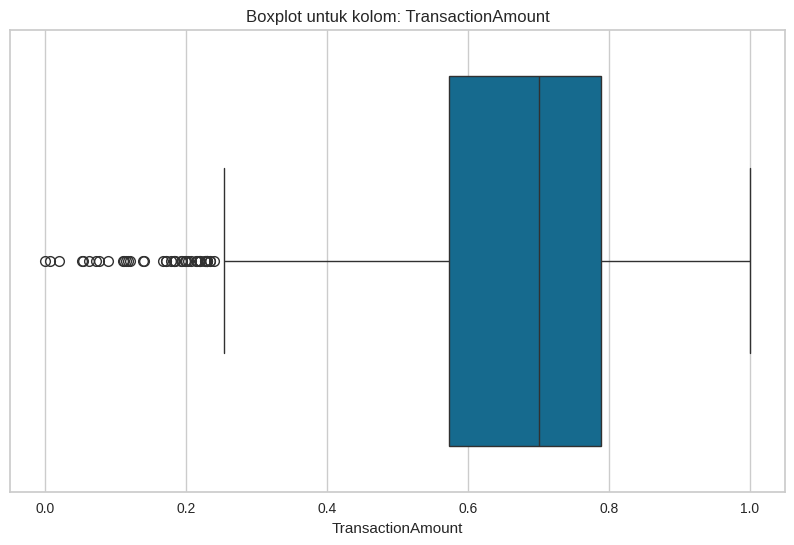

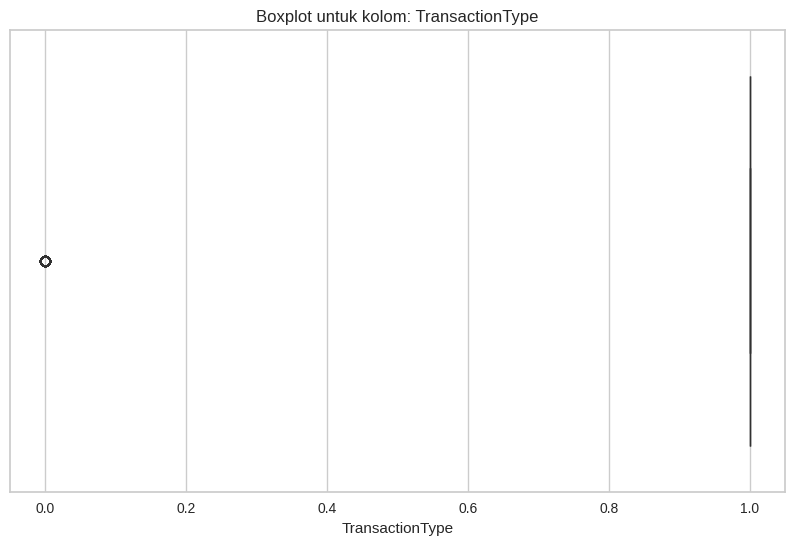

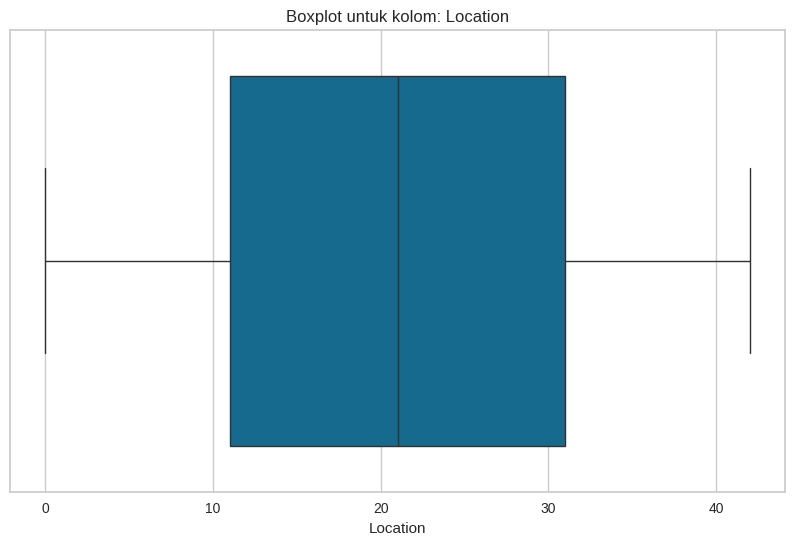

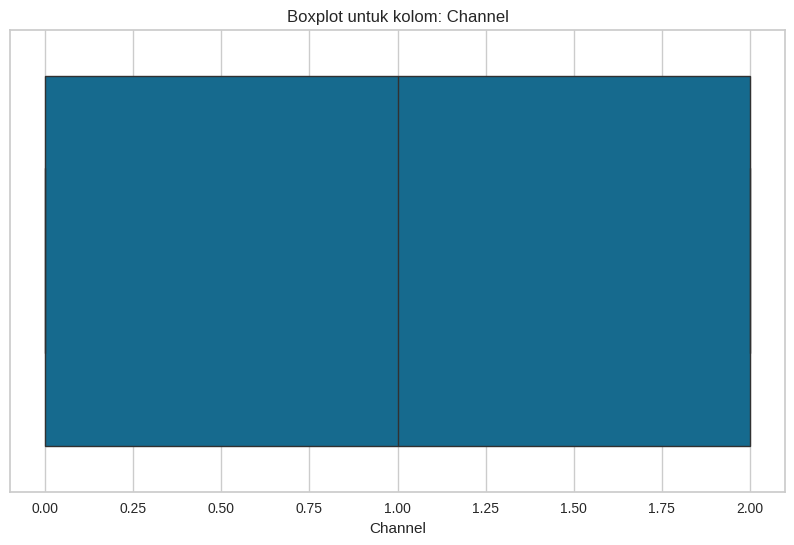

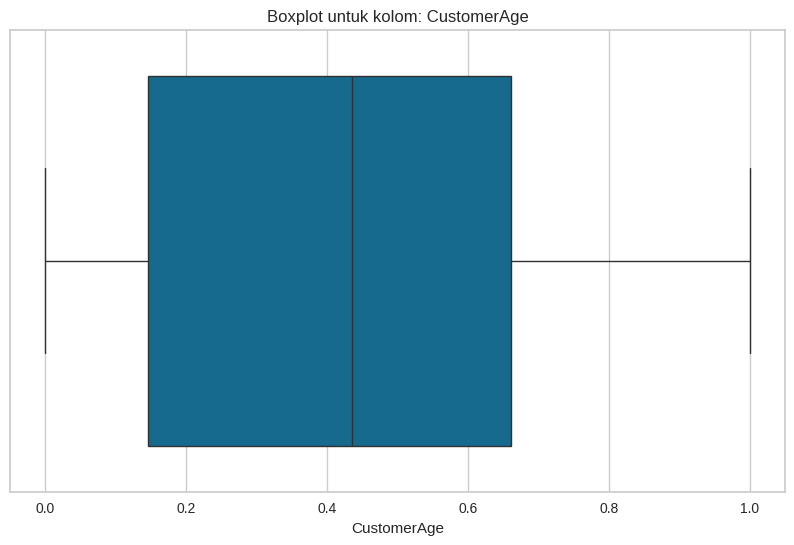

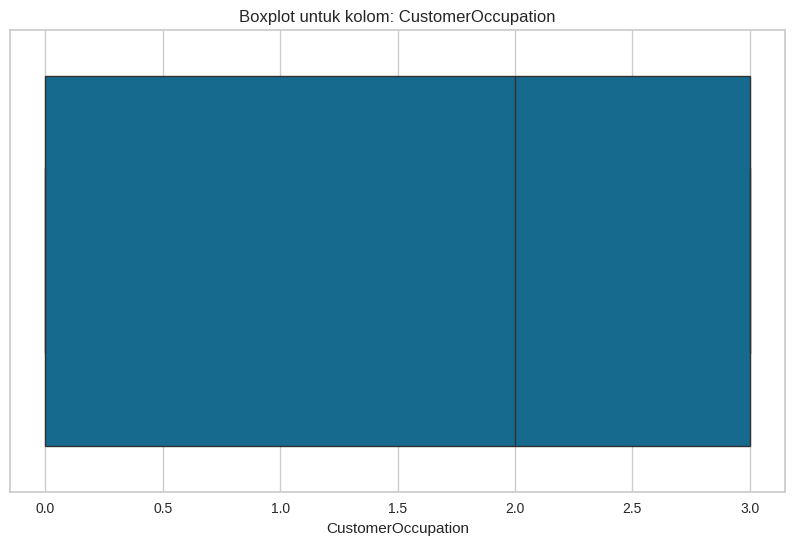

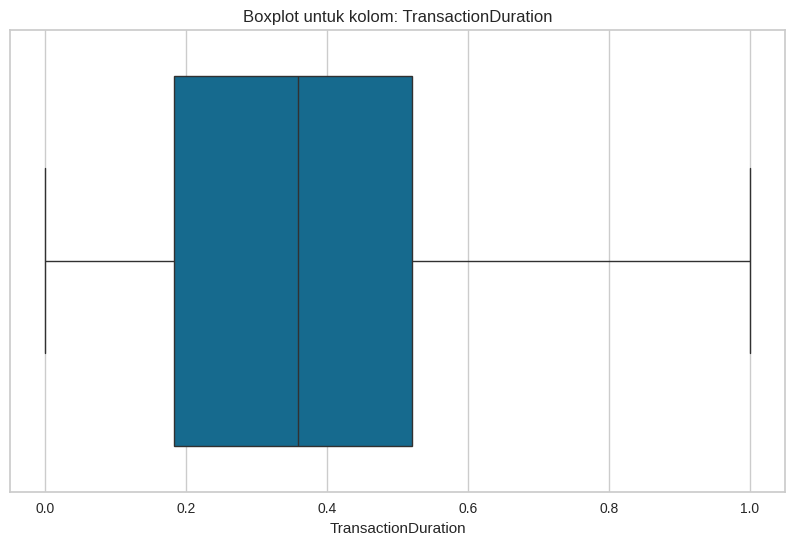

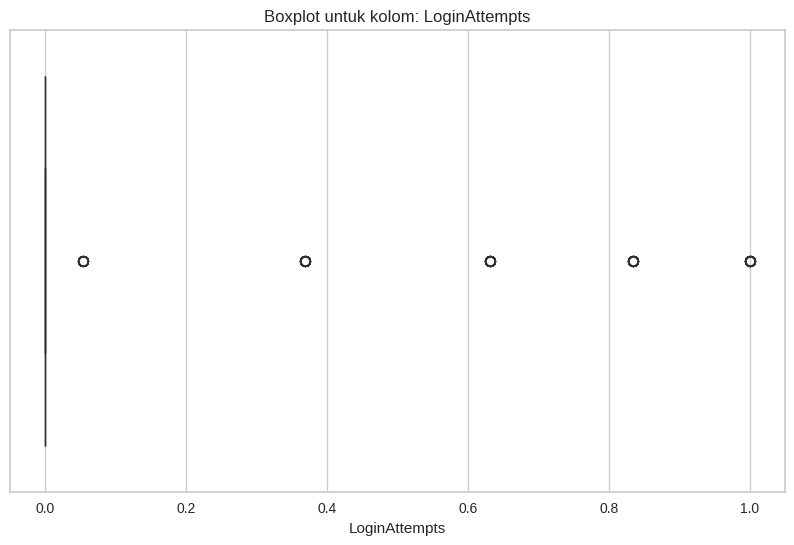

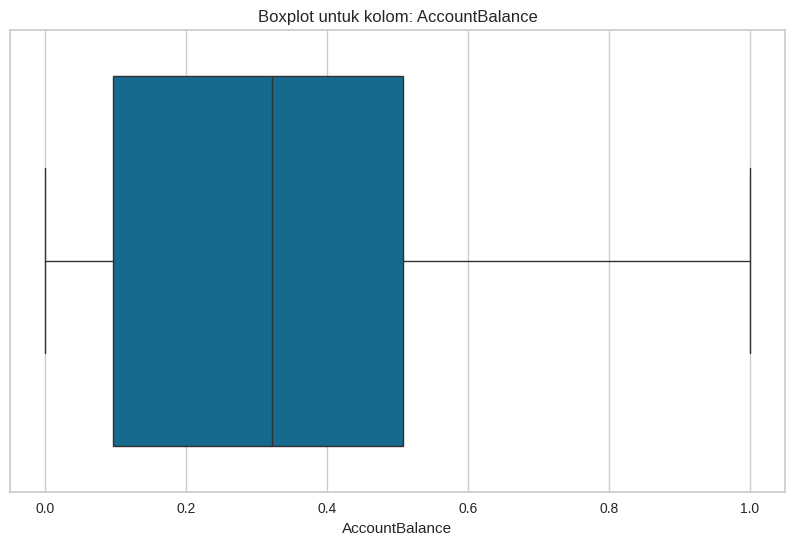

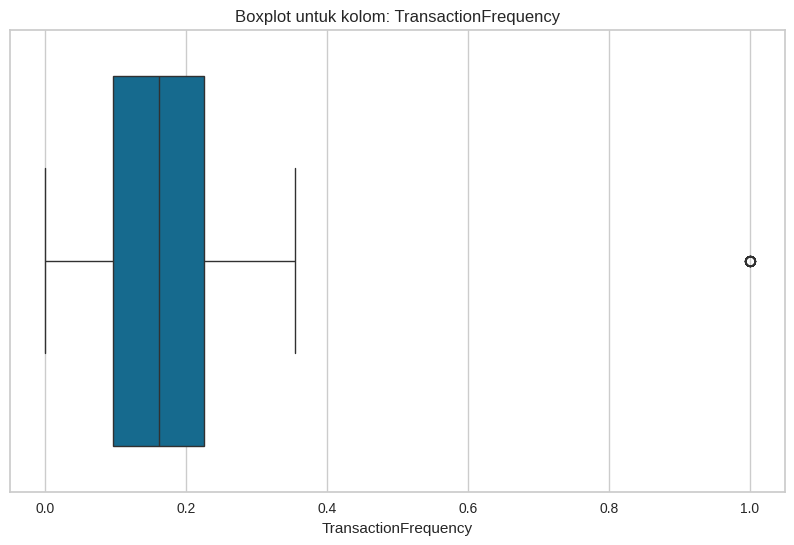

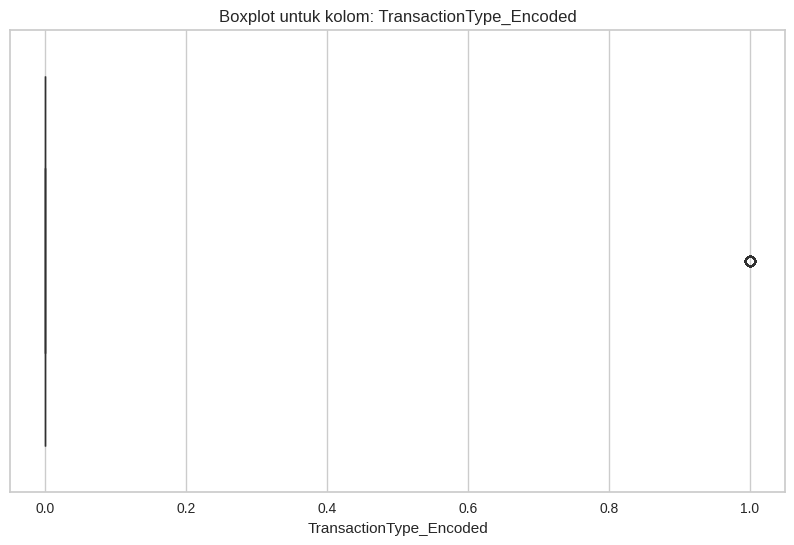

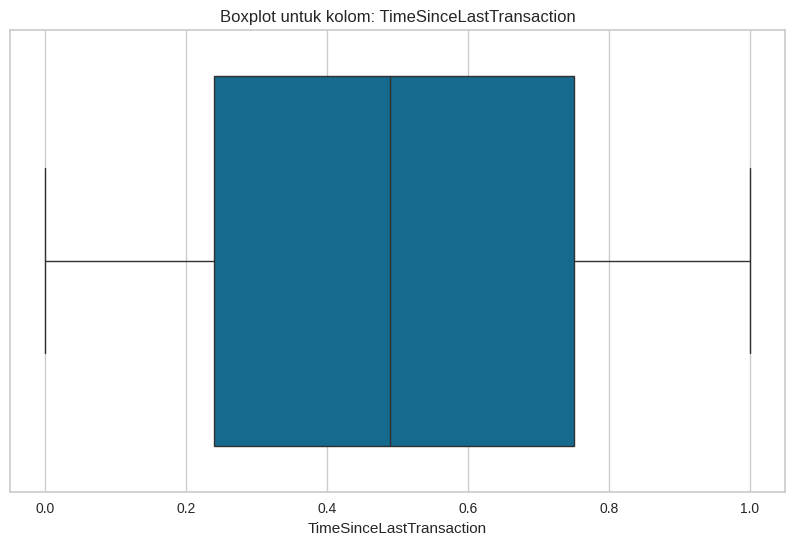

In [119]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot untuk kolom: {col}')
    plt.show()

In [120]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [121]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    df = cap_outliers(df, col)
    print(f"Outlier di kolom '{col}' telah di-cap.")


Outlier di kolom 'TransactionAmount' telah di-cap.
Outlier di kolom 'TransactionType' telah di-cap.
Outlier di kolom 'Location' telah di-cap.
Outlier di kolom 'Channel' telah di-cap.
Outlier di kolom 'CustomerAge' telah di-cap.
Outlier di kolom 'CustomerOccupation' telah di-cap.
Outlier di kolom 'TransactionDuration' telah di-cap.
Outlier di kolom 'LoginAttempts' telah di-cap.
Outlier di kolom 'AccountBalance' telah di-cap.
Outlier di kolom 'TransactionFrequency' telah di-cap.
Outlier di kolom 'TransactionType_Encoded' telah di-cap.
Outlier di kolom 'TimeSinceLastTransaction' telah di-cap.


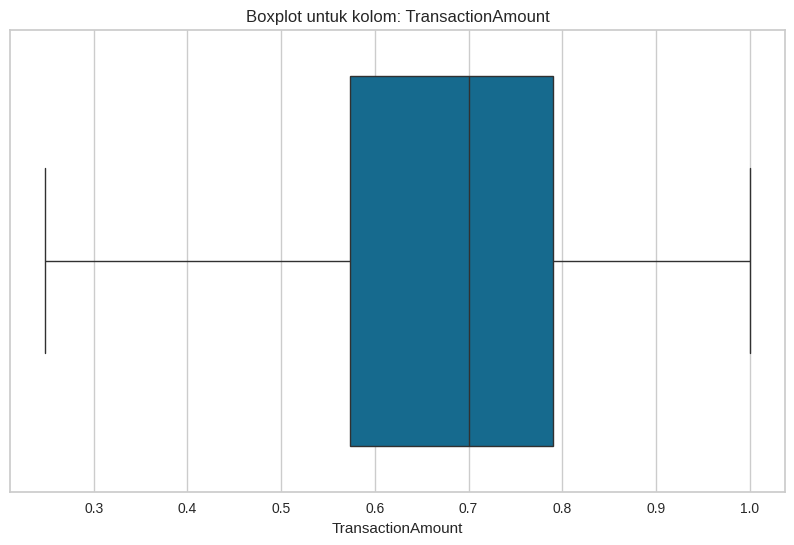

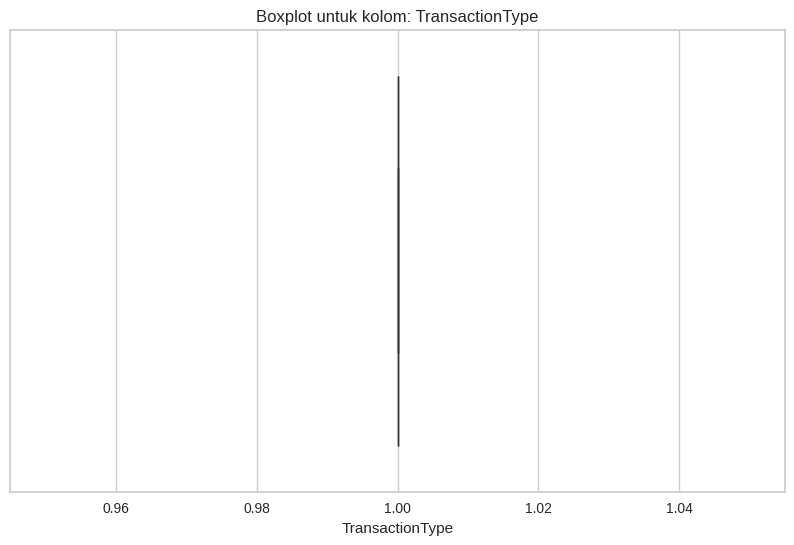

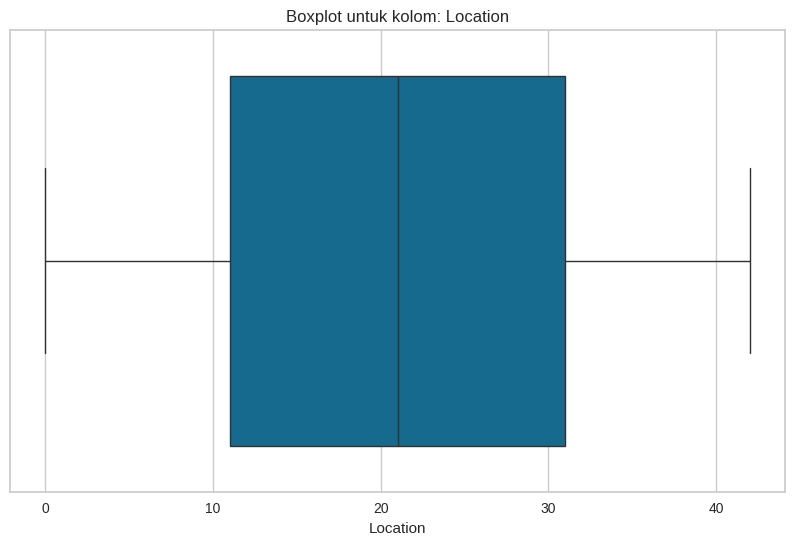

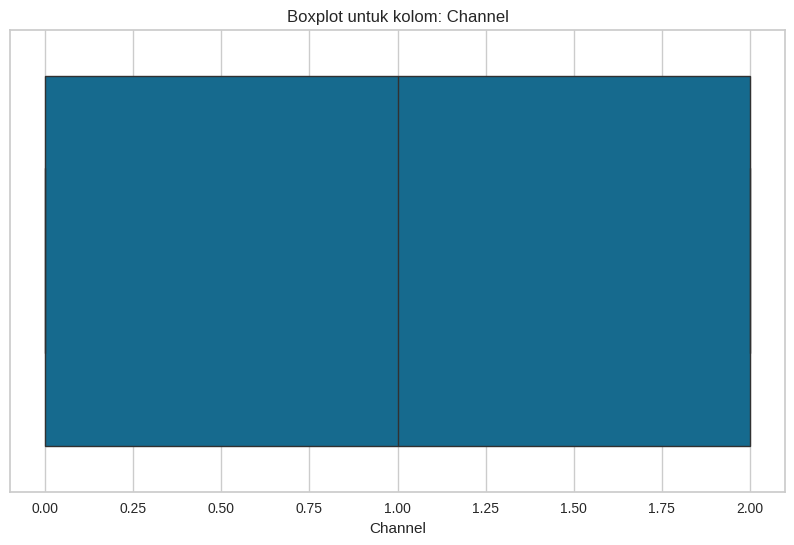

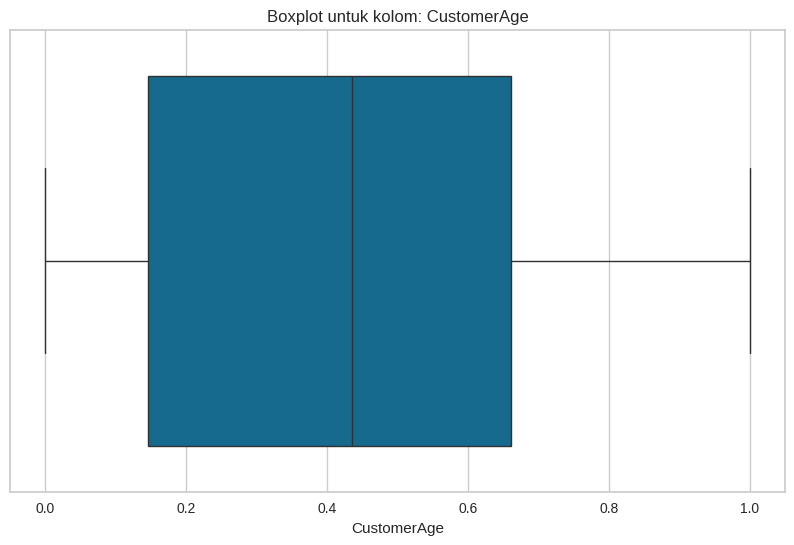

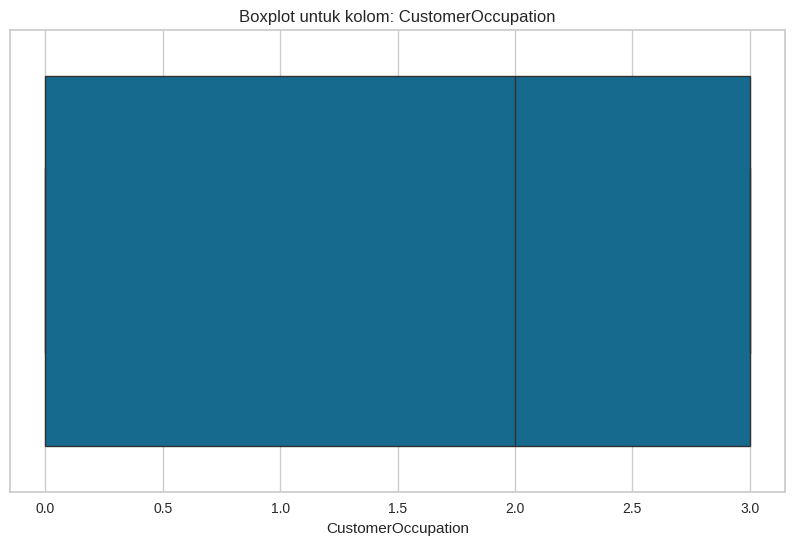

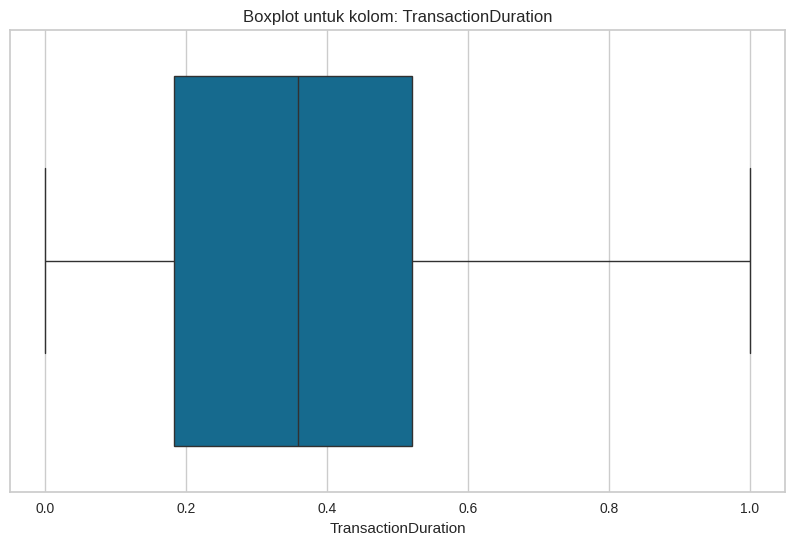

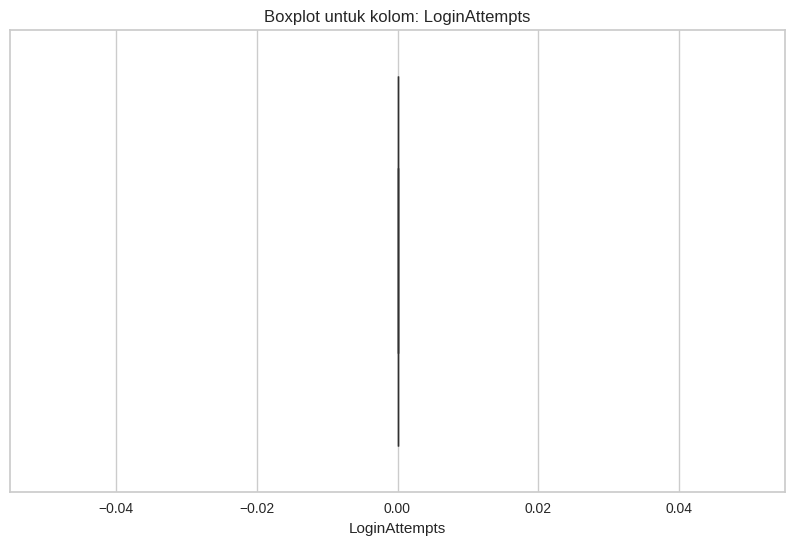

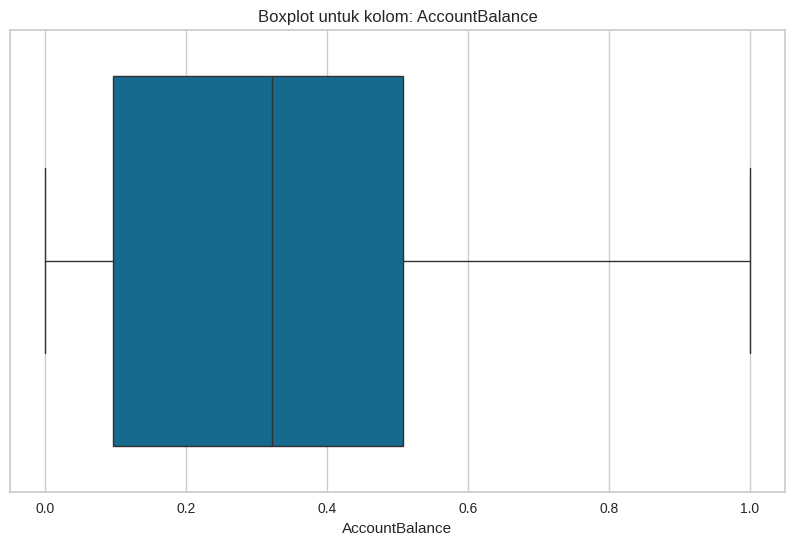

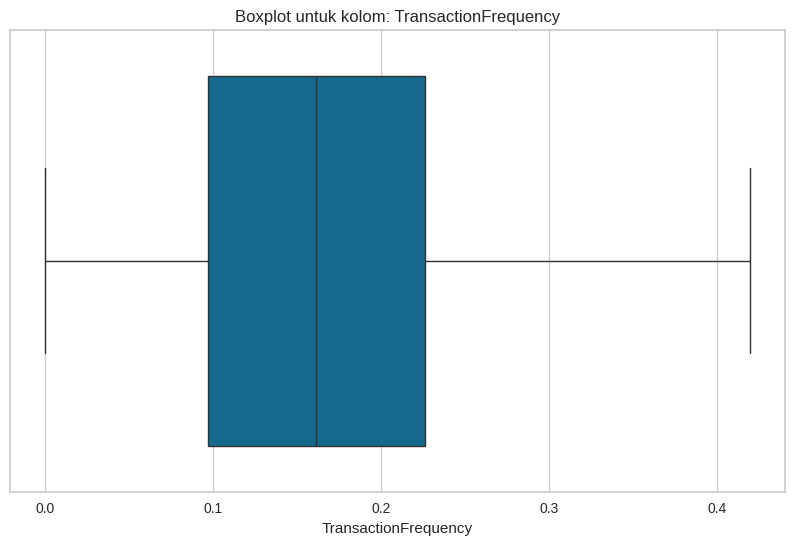

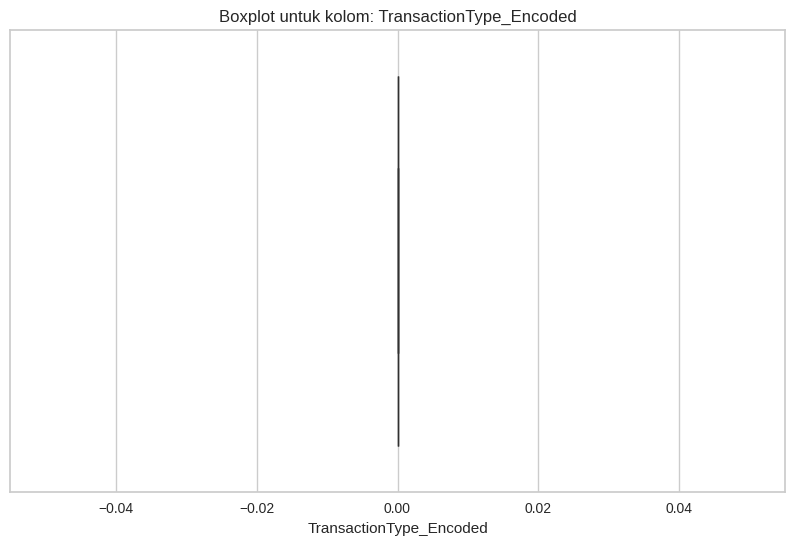

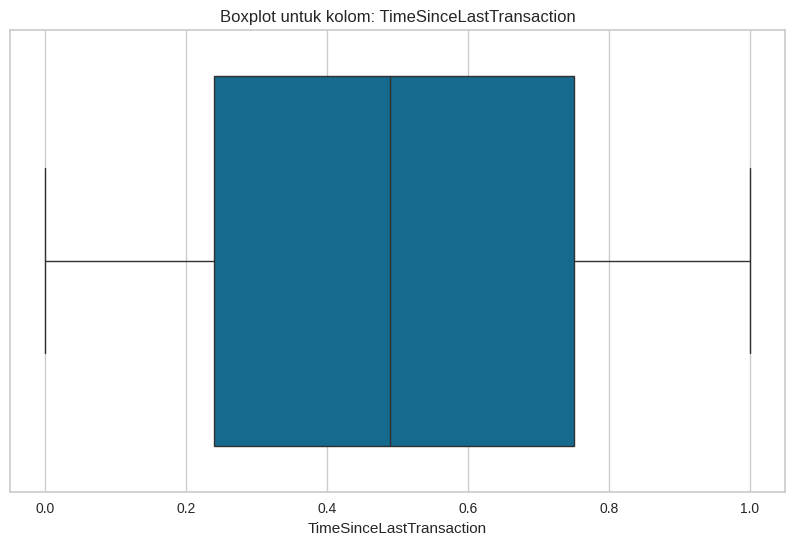

In [122]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot untuk kolom: {col}')
    plt.show()

In [123]:
df['CustomerAge_Binned'] = pd.cut(df['CustomerAge'],
                                   bins=3,
                                   labels=['Young', 'Middle-aged', 'Old'])

df['TransactionAmount_Binned'] = pd.cut(df['TransactionAmount'],
                                         bins=5,
                                         labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

df.head()


label_encoder_age = LabelEncoder()
label_encoder_amount = LabelEncoder()

df['CustomerAge_Binned_Encoded'] = label_encoder_age.fit_transform(df['CustomerAge_Binned'])
df['TransactionAmount_Binned_Encoded'] = label_encoder_amount.fit_transform(df['TransactionAmount_Binned'])

print("Hasil Binning dan Encoding:")
print(df[['CustomerAge', 'CustomerAge_Binned', 'CustomerAge_Binned_Encoded', 'TransactionAmount', 'TransactionAmount_Binned', 'TransactionAmount_Binned_Encoded']].head())


Hasil Binning dan Encoding:
   CustomerAge CustomerAge_Binned  CustomerAge_Binned_Encoded  \
0     0.838710                Old                           1   
1     0.806452                Old                           1   
2     0.016129              Young                           2   
3     0.129032              Young                           2   
4     0.430297        Middle-aged                           0   

   TransactionAmount TransactionAmount_Binned  \
0           0.338779                 Very Low   
1           0.777971                     High   
2           0.629737                   Medium   
3           0.681120                   Medium   
4           0.332866                 Very Low   

   TransactionAmount_Binned_Encoded  
0                                 4  
1                                 0  
2                                 2  
3                                 2  
4                                 4  


# **4. Membangun Model Clustering**


In [124]:
df.describe()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionFrequency,TransactionType_Encoded,TimeSinceLastTransaction,CustomerAge_Binned_Encoded,TransactionAmount_Binned_Encoded
count,2485.000000,2485,2485.0,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.0,2485.000000,2485,2485.000000,2485.0,2485.000000,2485.000000,2485.000000
mean,0.671702,2023-07-05 11:12:11.565392384,1.0,20.991952,0.985915,0.431565,1.517907,0.377688,0.0,0.338230,2024-11-04 08:09:22.597987840,0.164860,0.0,0.495192,1.069215,1.371026
min,0.248336,2023-01-02 16:00:06,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2024-11-04 08:06:23,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.573056,2023-04-03 16:07:53,1.0,11.000000,0.000000,0.145161,0.000000,0.182759,0.0,0.095617,2024-11-04 08:07:54,0.096774,0.0,0.239155,0.000000,0.000000
50%,0.700544,2023-07-07 16:38:12,1.0,21.000000,1.000000,0.435484,2.000000,0.358621,0.0,0.321244,2024-11-04 08:09:23,0.161290,0.0,0.489080,1.000000,1.000000
75%,0.789536,2023-10-06 16:37:16,1.0,31.000000,2.000000,0.661290,3.000000,0.520690,0.0,0.508058,2024-11-04 08:10:53,0.225806,0.0,0.750047,2.000000,2.000000
max,1.000000,2024-01-01 18:21:50,1.0,42.000000,2.000000,1.000000,3.000000,1.000000,0.0,1.000000,2024-11-04 08:12:23,0.419355,0.0,1.000000,2.000000,4.000000
std,0.161906,NaN,0.0,12.210642,0.803201,0.286674,1.134025,0.241039,0.0,0.260942,NaN,0.077329,0.0,0.292779,0.867209,1.300922


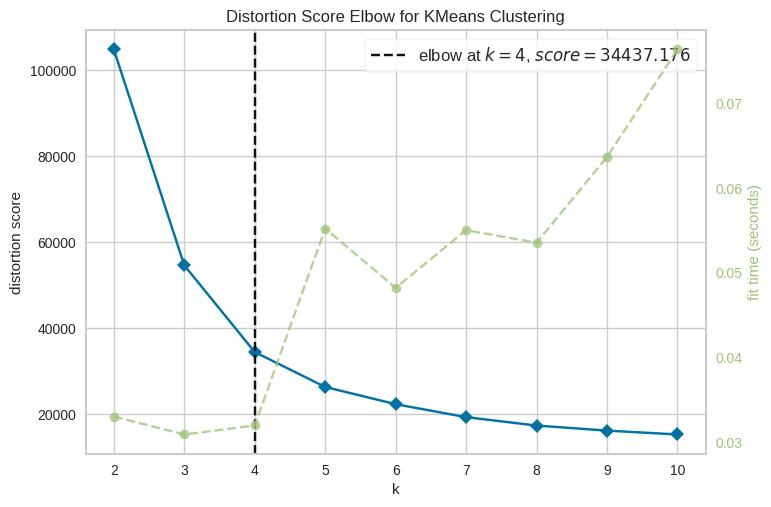

['/content/drive/MyDrive/python/dicoding/model_clustering.h5']

In [125]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import joblib

X = df.select_dtypes(include=np.number)

model_kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model_kmeans, k=(2,11))

visualizer.fit(X)
visualizer.show()

# Re-run KMeans with the optimal number of clusters found from the elbow method
# Replace 'optimal_k' with the actual optimal value from the plot
optimal_k = visualizer.elbow_value_ # Get the optimal k value
model_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
model_kmeans.fit(X)

joblib.dump(model_kmeans, "/content/drive/MyDrive/python/dicoding/model_clustering.h5")

In [126]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = model_kmeans.fit_predict(X)


In [127]:
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

In [128]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, df['Cluster'])

# Menampilkan nilai Silhouette Score
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.4704957344018652


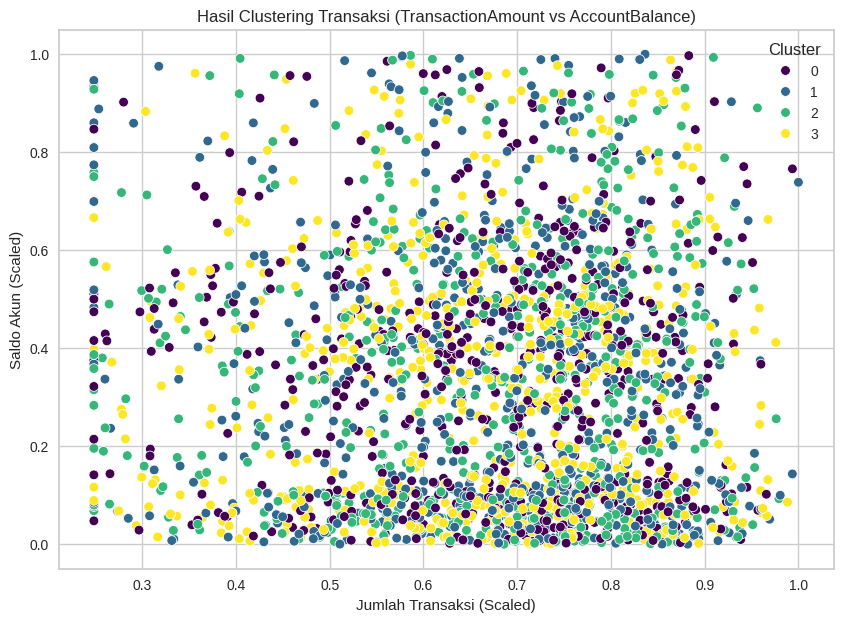

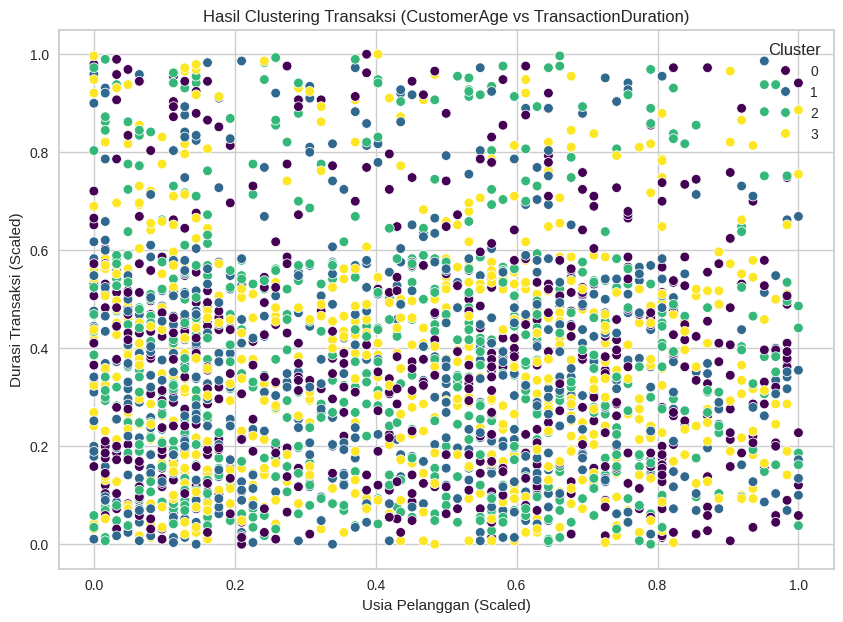

In [129]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='TransactionAmount', y='AccountBalance', hue='Cluster', palette='viridis')
plt.title('Hasil Clustering Transaksi (TransactionAmount vs AccountBalance)')
plt.xlabel('Jumlah Transaksi (Scaled)')
plt.ylabel('Saldo Akun (Scaled)')
plt.show()

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='CustomerAge', y='TransactionDuration', hue='Cluster', palette='viridis')
plt.title('Hasil Clustering Transaksi (CustomerAge vs TransactionDuration)')
plt.xlabel('Usia Pelanggan (Scaled)')
plt.ylabel('Durasi Transaksi (Scaled)')
plt.show()

In [130]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

data_final = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

model_kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
model_kmeans_pca.fit(data_final)


KMeans(n_clusters=np.int64(4), n_init=10, random_state=42)

In [131]:
joblib.dump(pca,"PCA_model_clustering.h5")

['PCA_model_clustering.h5']

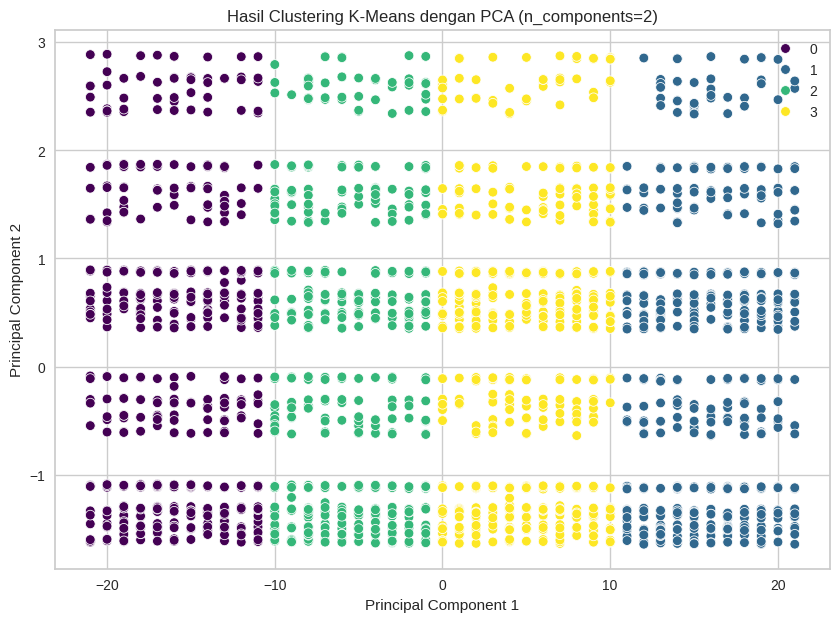

In [132]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data_final, x='PCA1', y='PCA2', hue=model_kmeans_pca.labels_, palette='viridis')
plt.title('Hasil Clustering K-Means dengan PCA (n_components=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [133]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, model_kmeans_pca.labels_)
print("Silhouette Score:", score)

from sklearn.metrics import davies_bouldin_score

score = davies_bouldin_score(X, model_kmeans_pca.labels_)
print("Davies-Bouldin Index:", score)

from sklearn.metrics import calinski_harabasz_score

score = calinski_harabasz_score(X, model_kmeans_pca.labels_)
print("Calinski-Harabasz Score:", score)

Silhouette Score: 0.4704957344018652
Davies-Bouldin Index: 0.6663369303580617
Calinski-Harabasz Score: 8347.67244618175


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**



In [134]:
pd.set_option('display.max_columns', None)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].groupby(df['Cluster']).agg(['mean', 'min', 'max'])


TransactionAmount                     TransactionType            \
                     mean       min       max            mean  min  max   
Cluster                                                                   
0                0.667738  0.248336  0.993592             1.0  1.0  1.0   
1                0.675391  0.248336  1.000000             1.0  1.0  1.0   
2                0.672783  0.248336  0.979210             1.0  1.0  1.0   
3                0.670923  0.248336  0.988374             1.0  1.0  1.0   

          Location               Channel           CustomerAge            \
              mean   min   max      mean  min  max        mean  min  max   
Cluster                                                                    
0         5.110016   0.0  10.0  1.003284  0.0  2.0    0.448764  0.0  1.0   
1        37.081967  32.0  42.0  1.003279  0.0  2.0    0.407563  0.0  1.0   
2        15.415858  11.0  20.0  0.977346  0.0  2.0    0.428526  0.0  1.0   
3        26.089506  21.0  31.0  0.961420  0.0  2.0    0.440894  0.0  1.0   

        CustomerOccupation           TransactionDuration                 \
                      mean  min  max                mean  min       max   
Cluster                                                                   
0                 1.568144  0.0  3.0            0.377366  0.0  1.000000   
1                 1.478689  0.0  3.0            0.368667  0.0  0.986207   
2                 1.422330  0.0  3.0            0.390964  0.0  0.996552   
3                 1.598765  0.0  3.0            0.373821  0.0  1.000000   

        LoginAttempts           AccountBalance                      \
                 mean  min  max           mean       min       max   
Cluster                                                              
0                 0.0  0.0  0.0       0.336492  0.001885  0.997144   
1                 0.0  0.0  0.0       0.339584  0.000064  1.000000   
2                 0.0  0.0  0.0       0.345072  0.000000  0.997633   
3                 0.0  0.0  0.0       0.332064  0.000774  0.988352   

        TransactionFrequency                TransactionType_Encoded            \
                        mean  min       max                    mean  min  max   
Cluster                                                                         
0                   0.162509  0.0  0.419355                     0.0  0.0  0.0   
1                   0.164622  0.0  0.419355                     0.0  0.0  0.0   
2                   0.167189  0.0  0.419355                     0.0  0.0  0.0   
3                   0.165074  0.0  0.419355                     0.0  0.0  0.0   

        TimeSinceLastTransaction                      \
                            mean       min       max   
Cluster                                                
0                       0.494490  0.000124  0.999944   
1                       0.494795  0.000088  0.999983   
2                       0.496822  0.000261  1.000000   
3                       0.494672  0.000000  0.999998   

        CustomerAge_Binned_Encoded         TransactionAmount_Binned_Encoded  \
                              mean min max                             mean   
Cluster                                                                       
0                         1.095238   0   2                         1.367816   
1                         1.113115   0   2                         1.373770   
2                         1.050162   0   2                         1.336570   
3                         1.021605   0   2                         1.404321   

                 
        min max  
Cluster          
0         0   4  
1         0   4  
2         0   4  
3         0   4

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah Aktif dari Lokasi Luas)**:
  - **Rata-rata (TransactionAmount) :** 0.1502 (tinggi)
  - **Rata-rata (Location) :** 37.08 (paling tinggi)
  - **Analisis:** Nasabah di cluster ini bertransaksi dalam nominal cukup besar dan tersebar di banyak lokasi. Ini mengindikasikan jangkauan layanan yang luas atau pengguna dari daerah berbeda.

2. **Cluster 1: (Nasabah Lokal Usia Lebih Tua)**:
  - **Rata-rata (CustomerAge) :** 0.4487 (tertinggi)
  - **Rata-rata (Location) :** 5.11 (paling rendah)
  - **Analisis:** Kelompok ini terdiri dari pelanggan berusia lebih matang namun tinggal di area terbatas/lokal. Perilaku konsumsi cenderung konservatif.

3. **Cluster 2: (Nasabah Produktif Secara Karier)**:
  - **Rata-rata (CustomerOccupation) :** 1.598 (tertinggi)
  - **Rata-rata (TransactionAmount) :** 0.1446 (sedang)
  - **Analisis:** Nasabah ini didominasi oleh pekerja aktif/profesional, namun pengeluaran mereka belum besar. Mungkin mereka cenderung menabung atau sedang membangun kestabilan finansial.

4. **Cluster 3: (Nasabah Elite & Konsisten)**:
  - **Rata-rata (TransactionAmount) :** 0.1516 (paling tinggi)
  - **Rata-rata (AccountBalance) :** 0.3452 (paling tinggi)
  - **Analisis:** Ini adalah nasabah dengan daya beli tinggi dan saldo tabungan terbesar. Mereka kemungkinan adalah pelanggan prioritas.

In [135]:
df = df.rename(columns={'Cluster': 'Target'})

In [136]:
df.to_csv('/content/drive/MyDrive/python/dicoding/data_clustering.csv', index=False)

End of Code.